In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

Text(0, 0.5, 'Frequência')

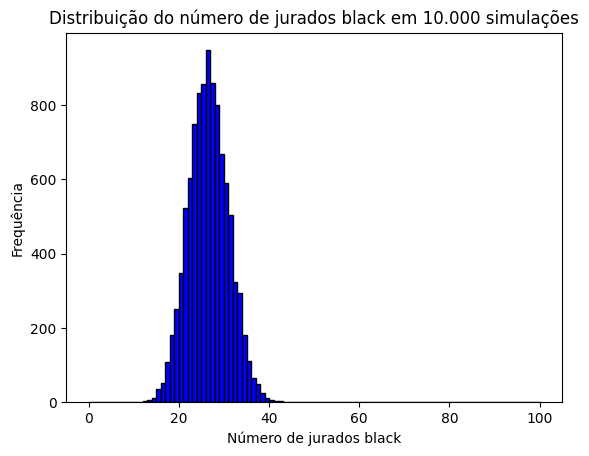

In [8]:
# se H0 é verdade, como seria a seleção do juri com 26% da população sendo black?
sample_size = 100
black_proportion = 0.26
white_proportion = 1 - black_proportion

n_simulations = 10000
results = []

for _ in range(n_simulations):
    sample = pd.Series(
        np.random.choice(
            ['black', 'white'],
            size=sample_size,
            p=[black_proportion, white_proportion]
        )
    )
    n_black = (sample == 'black').sum()
    results.append(n_black)

results_series = pd.Series(results)

# Plotando o histograma dos resultados
plt.hist(results_series, bins=range(0, sample_size + 1), color='blue', edgecolor='black')
plt.title('Distribuição do número de jurados black em 10.000 simulações')
plt.xlabel('Número de jurados black')
plt.ylabel('Frequência')




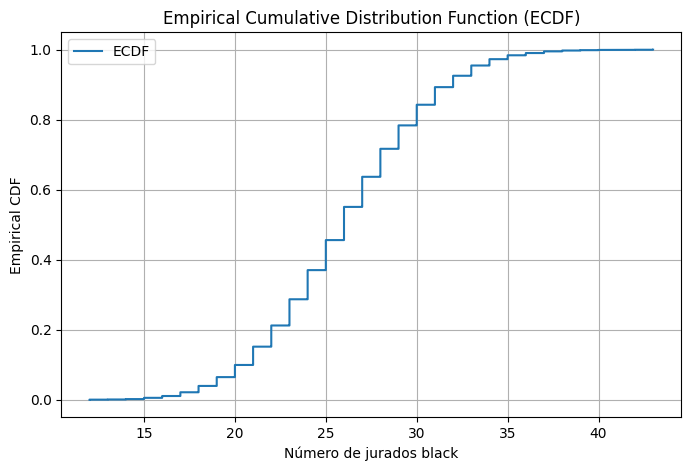

In [9]:
# plota a CDF dos resultados das simulações
ecdf = ECDF(results_series)

plt.figure(figsize=(8, 5))
plt.step(ecdf.x, ecdf.y, where='post', label='ECDF')
plt.xlabel('Número de jurados black')
plt.ylabel('Empirical CDF')
plt.title('Empirical Cumulative Distribution Function (ECDF)')
plt.grid(True)
plt.legend()
plt.show()


In [12]:
# calcula o p-valor para observar 8 ou menos jurados black
p_value = ecdf(8)
print(f'P-valor para observar 8 ou menos jurados black: {p_value:.4f}')
print(f'P-valor para observar 35 ou mais jurados black: {(1 - ecdf(35)):.4f}')

P-valor para observar 8 ou menos jurados black: 0.0000
P-valor para observar 35 ou mais jurados black: 0.0159


Text(0, 0.5, 'Frequência')

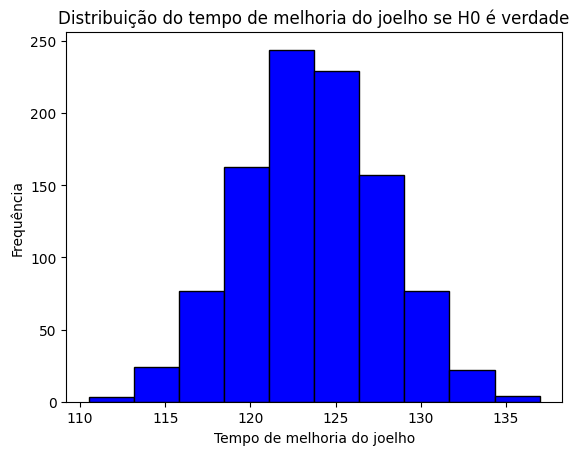

In [25]:
# exercicio 8.4.15 https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Introductory_Statistics_(Shafer_and_Zhang)/08%3A_Testing_Hypotheses/8.E%3A_Testing_Hypotheses_(Exercises)

mu0 = 123.7
n = 7
muSample = 132.28
sdSample = 10.98 / np.sqrt(n)

# assumindo que a variancia da amostra caputura a da populacao
plt.hist(np.random.normal(loc=mu0, scale=sdSample, size=1000), color='blue', edgecolor='black')
plt.title('Distribuição do tempo de melhoria do joelho se H0 é verdade')
plt.xlabel('Tempo de melhoria do joelho')
plt.ylabel('Frequência')